In [2]:
from scipy.special import comb
import math
import numpy as np
import matplotlib.pyplot as plt
### imported packages for the MajorityVoteClassifier section of this notebook
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator

In [3]:
def ensemble_error(n_classifier,error):
    k_start = int(math.ceil(n_classifier/2.))
    probs = [comb(n_classifier,k) * error**k * (1-error)**(n_classifier - k)
             for k in range(k_start,n_classifier + 1)]
    return sum(probs)

In [4]:
ensemble_error(11, 0.25)

np.float64(0.03432750701904297)

### A more readable style of the above function...

#### what this function is outputing is the probability that an ensemble model would make an incorrect prediction based on majority voting.  It is taking into account the number of classifiers (n_classifiers) and the error rate (error_rate) that a single classifier is wrong.  

In [5]:
def ensemble_error(n_classifiers, error_rate):
    """
    Calculate the probability that a majority-vote ensemble classifier
    makes an incorrect prediction.

    Args:
        n_classifiers (int): Number of individual classifiers in the ensemble.
        error_rate (float): Probability that a single classifier is wrong.

    Returns:
        float: Probability that the ensemble's majority vote is wrong.
    """

    # The ensemble is wrong only if MORE THAN HALF of the classifiers are wrong.
    # This is the smallest number of wrong classifiers that flips the majority.
    min_wrong = math.ceil(n_classifiers / 2)

    # Compute the probability that exactly k classifiers are wrong,
    # for every k from min_wrong up to all classifiers being wrong.
    probabilities = []

    for k in range(min_wrong, n_classifiers + 1):
        # Binomial probability:
        #   comb(n, k) * (error_rate^k) * ((1 - error_rate)^(n - k))
        prob_k_wrong = comb(n_classifiers, k) \
                       * (error_rate ** k) \
                       * ((1 - error_rate) ** (n_classifiers - k))
        probabilities.append(prob_k_wrong)

    # The total probability of a wrong ensemble decision
    # is the sum of all cases where the majority is wrong.
    return sum(probabilities)


In [6]:
ensemble_error(11, 0.25)

np.float64(0.03432750701904297)

### Computing the theoretical ensemble error rates for a range of different base errors from 0 to 1 to visualize the relationship of the base error rate of a single model vs an ensemble model

In [7]:
error_range = np.arange(0.1,1.01,0.01)

ens_errors = [ensemble_error(n_classifiers=11, error_rate=error_rate) for error_rate in error_range]

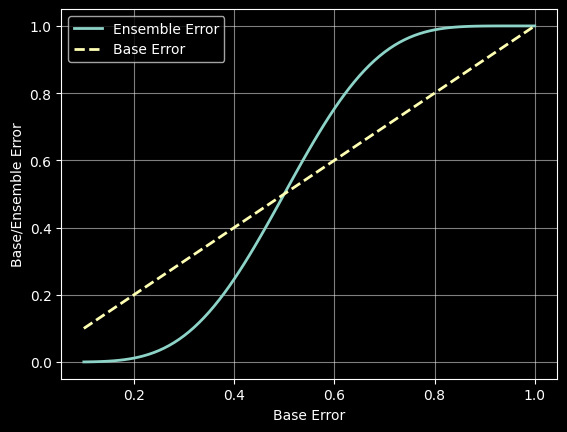

In [8]:
plt.plot(error_range,ens_errors,label='Ensemble Error',linewidth=2)
plt.plot(error_range,error_range,linestyle='--',label='Base Error',linewidth=2)
plt.xlabel('Base Error')
plt.ylabel('Base/Ensemble Error')
plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

##### takeaway from above plot: ensemble methods always perform better than a singular base model AS LONG AS the predictions are better than random guess (above 0.50 or 50% probability)

# Combining Classifiers via majority vote

In [9]:
np.argmax(np.bincount([0,0,1],weights=[0.2,0.2,0.6]))

np.int64(1)

In [ ]:
# example of output probabilities from different models with average probabilities from the weighted ensembling of the models
# column 0 is the probability of class 0 and column 1 is the probability of class 1
example = np.array([[0.9,0.1],
                    [0.8,0.2],
                    [0.4,0.6]])

average_probabilities = np.average(example,axis=0,weights=[0.2,0.2,0.6])
average_probabilities

array([0.58, 0.42])

In [12]:
# the predicted classification from the weighted ensemble is class 0 (below)
np.argmax(average_probabilities)

np.int64(0)